In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
df.sample(5)  #Return a random sample of items from an axis of object.

,v1,v2
292,ham,Oops. 4 got that bit.
4720,ham,"Yup. Anything lor, if u dun wan it's ok..."
5126,ham,"To the wonderful Okors, have a great month. We..."
1687,spam,Free Top ringtone -sub to weekly ringtone-get ...
4041,ham,What time do u get out?


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
df['v1']=encoder.fit_transform(df['v1'])
df['v1'].sample(5)

892     0
2114    1
4360    0
2747    0
3793    0
Name: v1, dtype: int32

In [ ]:
# Check for missing values in each column and sum the number of missing values in each column
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
# Check for duplicated rows in the DataFrame and sum the number of duplicated rows
df.duplicated().sum()

403

In [ ]:
# Remove duplicated rows from the DataFrame and update the DataFrame with the modified version
df.drop_duplicates(inplace=True)
df.sample(5)

,v1,v2
3582,0,I sent your maga that money yesterday oh.
4796,1,Santa calling! Would your little ones like a c...
3351,0,Call him and say you not coming today ok and t...
253,0,"Ups which is 3days also, and the shipping comp..."
1173,0,ÌÏ dun need to pick ur gf?


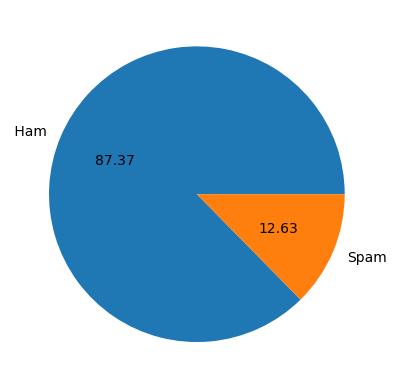

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df['v1'].value_counts() #Return a Series containing the frequency of each distinct row in the Dataframe.
plt.pie(df['v1'].value_counts(),labels=[' Ham','Spam'],autopct='%0.2f')
#To add percentages to each of the constitutents of the pie chart,add autopct='%1.1f%%', to the plt.pie() function.
#This formats the percentage to the tenth place.
# to format the percentage to the hundredths place,  use the statement, autopct='%1.2f%%'
# to format the percentage to the thousandths place,  use the statement, autopct='%1.3f%%'
plt.show()

In [ ]:
# Downloading 'punkt' package from NLTK (Natural Language Toolkit) for tokenization
import nltk
nltk.download('punkt')

# Calculate the number of characters in each text message and create a new column 'num_characters'
df['num_characters'] = df['v2'].apply(len)

# Tokenize each text message into words using NLTK's word_tokenize function
from nltk.tokenize import word_tokenize
df['tokenized_text'] = df['v2'].apply(lambda x: nltk.word_tokenize(x))

# Calculate ASCII values for each character in the 'v1' column and create a new column 'ascii'
df['ascii'] = df['v1'].apply(lambda x: ord(str(x)))

# Remove the 'ascii' column from the DataFrame
df.drop(columns=['ascii'], inplace=True)

# Calculate the number of words in each text message and create a new column 'num_words'
df['num_words'] = df['v2'].apply(lambda x: len(nltk.word_tokenize(x)))

# Display the DataFrame head to visualize the changes
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,v1,v2,num_characters,tokenized_text,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15


In [ ]:
# Statistics for 'num_characters' and 'num_words' columns for ham messages
df[df['v1'] == 0][['num_characters', 'num_words']].describe()

,num_characters,num_words
count,4516.000000,4516.000000
mean,70.459256,17.123782
std,56.358207,13.493970
min,2.000000,1.000000
25%,34.000000,8.000000
50%,52.000000,13.000000
75%,90.000000,22.000000
max,910.000000,220.000000


In [ ]:
# Statistics for 'num_characters' and 'num_words' columns for spam messages
df[df['v1'] == 1][['num_characters', 'num_words']].describe()

,num_characters,num_words
count,653.000000,653.000000
mean,137.891271,27.667688
std,30.137753,7.008418
min,13.000000,2.000000
25%,132.000000,25.000000
50%,149.000000,29.000000
75%,157.000000,32.000000
max,224.000000,46.000000


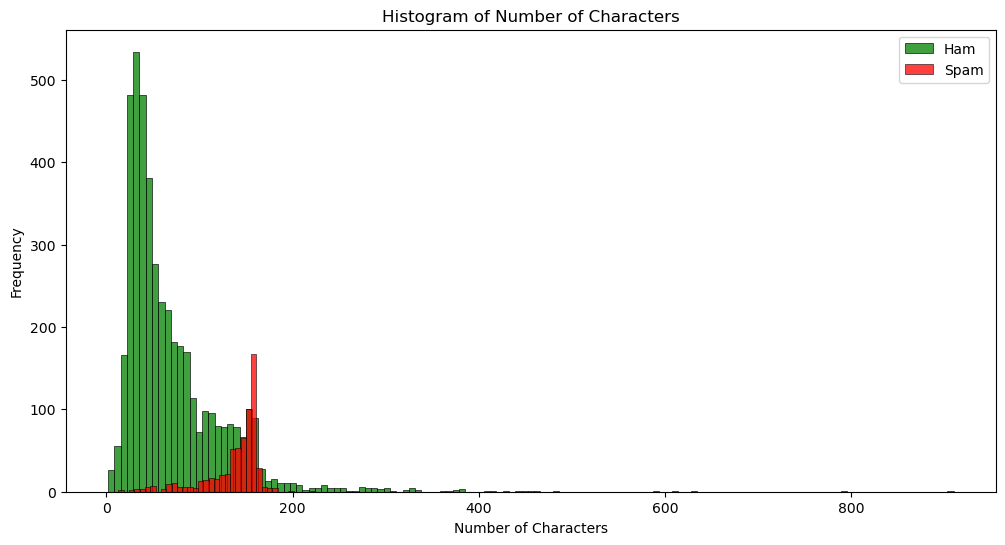

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms of 'num_characters' for ham and spam messages
plt.figure(figsize=(12, 6))
sns.histplot(df[df['v1'] == 0]['num_characters'], color='green', label='Ham')
sns.histplot(df[df['v1'] == 1]['num_characters'], color='red', label='Spam')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Characters')
plt.legend()
plt.show()

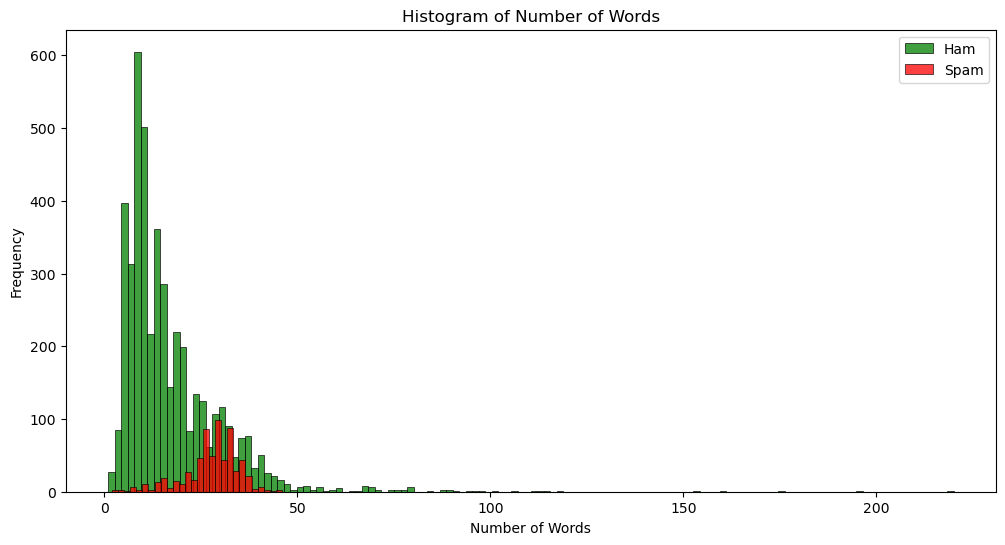

In [ ]:
# Plot histograms of 'num_words' for ham and spam messages
plt.figure(figsize=(12, 6))
sns.histplot(df[df['v1'] == 0]['num_words'], color='green', label='Ham')
sns.histplot(df[df['v1'] == 1]['num_words'], color='red', label='Spam')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words')
plt.legend()
plt.show()

In [ ]:
# Check unique values in 'v1' column
print(df['v1'].unique())

[0 1]


In [ ]:
# Check for non-numeric values in the DataFrame, excluding 'v2' column
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print(df[non_numeric_columns].head())

                                                  v2  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                      tokenized_text  
0  [Go, until, jurong, point, ,, crazy, .., Avail...  
1           [Ok, lar, ..., Joking, wif, u, oni, ...]  
2  [Free, entry, in, 2, a, wkly, comp, to, win, F...  
3  [U, dun, say, so, early, hor, ..., U, c, alrea...  
4  [Nah, I, do, n't, think, he, goes, to, usf, ,,...  


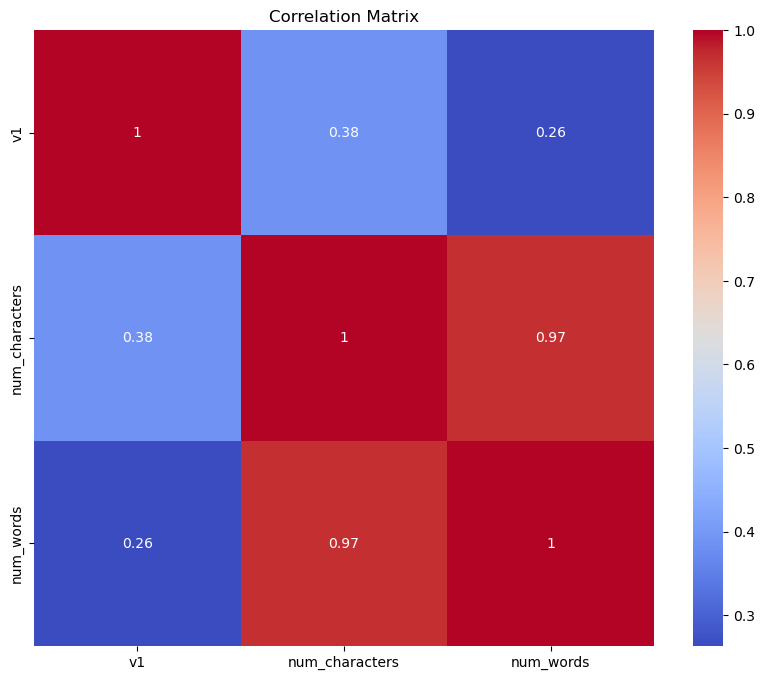

In [ ]:
# Select only numeric columns for computing correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_df = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
def text_transform(message):
    message = message.lower()  # Convert to lowercase
    message = nltk.word_tokenize(message)
    y = []

    # Check for punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message = y[:]
    y.clear()

    # Apply stemming
    for i in message:
        y.append(ps.stem(i))

    return " ".join(y)  # Return the transformed message as a string

In [ ]:
# Download stopwords from NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords

# Display the number of stopwords in English
print(len(stopwords.words('english')))

# Import punctuation from string module
import string

# Display all punctuations
print(string.punctuation)

179
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Import PorterStemmer for stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# Apply text transformation to the 'v2' column and store the result in 'transformed_msg'
df['transformed_msg'] = df['v2'].apply(text_transform)


df.head(5)

,v1,v2,num_characters,tokenized_text,num_words,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,nah n't think goe usf live around though


In [ ]:
# Calculate the number of words in each text message and create a new column 'num_words'
df['new_num_words'] = df['transformed_msg'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,v1,v2,num_characters,tokenized_text,num_words,transformed_msg,new_num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,go jurong point crazi .. avail bugi n great wo...,19
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,ok lar ... joke wif u oni ...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,free entri 2 wkli comp win fa cup final tkt 21...,27
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,u dun say earli hor ... u c alreadi say ...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,nah n't think goe usf live around though,8


In [ ]:
# Import TfidfVectorizer to convert text into TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_msg']).toarray()
y = df['v1'].values

print("Size of X:", X.shape)
print(y)

Size of X: (5169, 3000)
[0 0 1 ... 0 0 0]


In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# Import Naive Bayes classifiers
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Import evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Initialize the Naive Bayes classifiers
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

# Fit Gaussian Naive Bayes classifier to the training data
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred1 = gnb.predict(X_test)

# Print accuracy, confusion matrix, and precision score for Gaussian Naive Bayes
print('Accuracy score of Gaussian NB is: ', accuracy_score(y_test, y_pred1))
print('Confusion Matrix of Gaussian NB is: ', confusion_matrix(y_test, y_pred1))
print('Precision score of the Gaussian NB is', precision_score(y_test, y_pred1))

Accuracy score of Gaussian NB is:  0.8781431334622823
Confusion Matrix of Gaussian NB is:  [[790 106]
 [ 20 118]]
Precision score of the Gaussian NB is 0.5267857142857143


In [ ]:
# Initialize the Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Fit Bernoulli Naive Bayes classifier to the training data
bnb.fit(X_train, y_train)

# Make predictions on the testing data using Bernoulli Naive Bayes
y_pred2 = bnb.predict(X_test)

# Print accuracy, confusion matrix, and precision score for Bernoulli Naive Bayes
print('Accuracy score of Bernoulli NB is: ', accuracy_score(y_test, y_pred2))
print('Confusion Matrix of Bernoulli NB is: ', confusion_matrix(y_test, y_pred2))
print('Precision score of Bernoulli NB is', precision_score(y_test, y_pred2))

Accuracy score of Bernoulli NB is:  0.988394584139265
Confusion Matrix of Bernoulli NB is:  [[896   0]
 [ 12 126]]
Precision score of Bernoulli NB is 1.0


In [ ]:
# Initialize the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Fit Multinomial Naive Bayes classifier to the training data
mnb.fit(X_train, y_train)

# Make predictions on the testing data using Multinomial Naive Bayes
y_pred3 = mnb.predict(X_test)

# Print accuracy, confusion matrix, and precision score for Multinomial Naive Bayes
print('Accuracy score of Multinomial NB is: ', accuracy_score(y_test, y_pred3))
print('Confusion Matrix of Multinomial NB is: ', confusion_matrix(y_test, y_pred3))
print('Precision score of Multinomial NB is', precision_score(y_test, y_pred3))

Accuracy score of Multinomial NB is:  0.9748549323017408
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 26 112]]
Precision score of Multinomial NB is 1.0
